In [189]:
DATE_TASK = "2022-03-06-ecoli-phapecoctavirus-core-genome"
DIR = mkpath("$(homedir())/workspace/$DATE_TASK")
cd(DIR)
DATE, TASK = match(r"^(\d{4}-\d{2}-\d{2})-(.*)$", DATE_TASK).captures

2-element Vector{Union{Nothing, SubString{String}}}:
 "2022-03-06"
 "ecoli-phapecoctavirus-core-genome"

In [2]:
import Pkg
Pkg.update()
pkgs = [
"JSON",
"HTTP",
"Dates",
"uCSV",
"DelimitedFiles",
"DataFrames",
"ProgressMeter",
"BioSequences",
"FASTX",
"Distances",
"StatsPlots",
"StatsBase",
"Statistics",
"MultivariateStats",
"Random",
"Primes",
"SparseArrays",
"SHA",
"GenomicAnnotations",
"Combinatorics",
"OrderedCollections",
"Downloads",
"Clustering",
"Revise",
"Mmap"
]

for pkg in pkgs
    try
        eval(Meta.parse("import $pkg"))
    catch
        Pkg.add(pkg)
        eval(Meta.parse("import $pkg"))
    end
end

# works but can't update locally, need to push and restart kernel to activate changes
# "https://github.com/cjprybol/Mycelia.git#master",
# didn't work
# "$(homedir())/git/Mycelia#master",
pkg_path = "$(homedir())/git/Mycelia"
try
    eval(Meta.parse("import $(basename(pkg_path))"))
catch
    # Pkg.add(url=pkg)
    Pkg.develop(path=pkg_path)
    # pkg = replace(basename(pkg), ".git#master" => "")
    # pkg = replace(basename(pkg), "#master" => "")
    eval(Meta.parse("import $(basename(pkg_path))"))
end

    Updating registry at `~/.julia/registries/General`
    Updating git-repo `https://github.com/cjprybol/Mycelia.git#master`
   Installed DualNumbers ──── v0.6.7
   Installed WeakRefStrings ─ v1.4.2
   Installed Tables ───────── v1.7.0
   Installed JLD2 ─────────── v0.4.22
   Installed Parsers ──────── v2.2.3
   Installed CSV ──────────── v0.10.3
    Updating `~/git/Mycelia/docs/Project.toml`
  [033835bb] ↑ JLD2 v0.4.21 ⇒ v0.4.22
    Updating `~/git/Mycelia/docs/Manifest.toml`
  [336ed68f] ↑ CSV v0.10.2 ⇒ v0.10.3
  [fa6b7ba4] ↑ DualNumbers v0.6.6 ⇒ v0.6.7
  [033835bb] ↑ JLD2 v0.4.21 ⇒ v0.4.22
  [69de0a69] ↑ Parsers v2.2.2 ⇒ v2.2.3
  [bd369af6] ↑ Tables v1.6.1 ⇒ v1.7.0
  [ea10d353] ↑ WeakRefStrings v1.4.1 ⇒ v1.4.2
Precompiling project...
  ✓ Tables
  ✓ DualNumbers
  ✓ TableOperations
  ✓ Mustache
  ✓ XLSX
  ✓ HypergeometricFunctions
  ✓ StructArrays
  ✓ StatsFuns
  ✓ StatsModels
  ✓ PrettyTables
  ✓ JLD2
  ✓ GeometryBasics
  ✓ MetaGraphs
  ✓ NetworkLayout
  ✓ Distributions
  ✓ GLM
  ✓ 

In [3]:
# https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?&id=$(tax_id)
# https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?lvl=0&amp;id=2733124
root_tax_id = 2733124

2733124

In [4]:
child_tax_ids = vcat(Mycelia.taxonomic_id_to_children(root_tax_id), root_tax_id)
# child_tax_ids = vcat(child_tax_ids, root_tax_id)

MATCH (n)<-[*]-(n2) WHERE n.tax_id IS NOT NULL AND n.tax_id = "2733124" RETURN DISTINCT n2.tax_id AS tax_id


25-element Vector{Int64}:
 1881104
 2734131
 1229753
 2734132
 2508195
 2734130
 1897495
 2734133
 2201417
 2738374
 2047918
 2144176
 2178929
 2695845
 2696455
 2696458
 2696383
 2696431
 2696432
 2697090
 2743961
 2761708
 2793345
 2900304
 2733124

In [5]:
# TODO
# here is where we should apply a filter where host == Escherichia
# need to load host information into neo4j taxonomy

In [6]:
# refseq_metadata = Mycelia.load_refseq_metadata()
ncbi_metadata = Mycelia.load_genbank_metadata()

,# assembly_accession,bioproject,biosample,wgs_master,refseq_category
,String,String,String,String,String
1,GCA_000001215.4,PRJNA13812,SAMN02803731,,reference genome
2,GCA_000001405.29,PRJNA31257,,,reference genome
3,GCA_000001515.5,PRJNA13184,SAMN02981217,AACZ00000000.4,na
4,GCA_000001545.3,PRJNA20869,SAMN02981238,ABGA00000000.1,na
5,GCA_000001635.9,PRJNA20689,,,reference genome
6,GCA_000001735.2,PRJNA10719,SAMN03081427,,reference genome
7,GCA_000001765.3,PRJNA10626,SAMN00779672,AADE00000000.2,na
8,GCA_000001895.4,PRJNA10629,SAMN02808228,AABR00000000.7,na
9,GCA_000001905.1,PRJNA12569,SAMN02953622,AAGU00000000.3,representative genome


In [7]:
show(ncbi_metadata[1:1, :], allcols=true)

1×23 DataFrame
 Row │ # assembly_accession  bioproject  biosample     wgs_master  refseq_category   taxid  species_taxid  organism_name            infraspecific_name  isolate  version_status  assembly_level  release_type  genome_rep  seq_rel_date  asm_name                submitter                          gbrs_paired_asm  paired_asm_comp  ftp_path                           excluded_from_refseq  relation_to_type_material  asm_not_live_date 
     │ String                String      String        String      String            Int64  Int64          String                   String              String   String          String          String        String      String        String                  String                             String           String           String                             String                String                     String            
─────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

In [8]:
tax_id_filter = map(taxid -> taxid in child_tax_ids, ncbi_metadata[!, "taxid"])
is_right_host = map(x -> occursin(r"Escherichia"i, x), ncbi_metadata[!, "organism_name"])
not_excluded = ncbi_metadata[!, "excluded_from_refseq"] .== ""
is_full = ncbi_metadata[!, "genome_rep"] .== "Full"
# assembly_levels = ["Complete Genome"]
assembly_levels = ["Complete Genome", "Chromosome"]
# assembly_levels = ["Complete Genome", "Chromosome", "Scaffold"]
# assembly_levels = ["Complete Genome", "Chromosome", "Scaffold", "Contig"]
assembly_level_filter = map(x -> x in assembly_levels, ncbi_metadata[!, "assembly_level"])
full_filter = is_full .& not_excluded .& assembly_level_filter .& tax_id_filter .& is_right_host
count(full_filter)

14

In [9]:
# TODO
# here is another place we could enforce host == escherichia
# we'll use a manual filter as a temporary solution

In [10]:
ncbi_metadata_of_interest = ncbi_metadata[full_filter, :]

,# assembly_accession,bioproject,biosample,wgs_master,refseq_category,taxid
,String,String,String,String,String,Int64
1,GCA_000906475.1,,,,na,1229753
2,GCA_002611945.1,,,,na,1881104
3,GCA_002612725.1,,,,na,1897495
4,GCA_004768905.1,,,,na,2178929
5,GCA_004794915.1,,,,na,2144176
6,GCA_005892245.1,,,,na,2508195
7,GCA_010120165.1,,,,na,2696383
8,GCA_010120825.1,,,,na,2696431
9,GCA_010120835.1,,,,na,2696432


In [11]:
# https://www.ncbi.nlm.nih.gov/sviewer/viewer.cgi?db=nuccore&report=genbank&id=GCA_021354775

In [12]:
# for col in names(ncbi_metadata_of_interest)
#     @show col, ncbi_metadata_of_interest[1, col]
# end

In [13]:
# GCA_002956955.1

In [14]:
# can I also get genbank record?????
# for extension in ["genomic.fna.gz", "protein.faa.gz"]
for extension in ["genomic.fna.gz", "protein.faa.gz", "genomic.gbff.gz"]
    outdir = mkpath(joinpath(DIR, extension))
    ProgressMeter.@showprogress for row in DataFrames.eachrow(ncbi_metadata_of_interest)
        url = Mycelia.ncbi_ftp_path_to_url(row["ftp_path"], extension)
        outfile = joinpath(outdir, basename(url))
        if !isfile(outfile)
            try
                Downloads.download(url, outfile)
            catch e
                # @show e
                showerror(stdout, e)
                # @assert extension == "protein.faa.gz"
                # here is where we should call prodigal to fill in protein annotations if we don't otherwise see them
            end
        end
    end
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


In [15]:
extension = "protein.faa.gz"
outdir = mkpath(joinpath(DIR, extension))

"/home/jupyter-cameron.prybol/workspace/2022-03-06-ecoli-phapecoctavirus-core-genome/protein.faa.gz"

In [16]:
fastx_files = filter(x -> !occursin(".ipynb_checkpoints", x), readdir(outdir, join=true))

14-element Vector{String}:
 "/home/jupyter-cameron.prybol/workspace/2022-03-06-ecoli-phapecoctavirus-core-genome/protein.faa.gz/GCA_000906475.1_ViralProj185315_protein.faa.gz"
 "/home/jupyter-cameron.prybol/workspace/2022-03-06-ecoli-phapecoctavirus-core-genome/protein.faa.gz/GCA_002611945.1_ASM261194v1_protein.faa.gz"
 "/home/jupyter-cameron.prybol/workspace/2022-03-06-ecoli-phapecoctavirus-core-genome/protein.faa.gz/GCA_002612725.1_ASM261272v1_protein.faa.gz"
 "/home/jupyter-cameron.prybol/workspace/2022-03-06-ecoli-phapecoctavirus-core-genome/protein.faa.gz/GCA_004768905.1_ASM476890v1_protein.faa.gz"
 "/home/jupyter-cameron.prybol/workspace/2022-03-06-ecoli-phapecoctavirus-core-genome/protein.faa.gz/GCA_004794915.1_ASM479491v1_protein.faa.gz"
 "/home/jupyter-cameron.prybol/workspace/2022-03-06-ecoli-phapecoctavirus-core-genome/protein.faa.gz/GCA_005892245.1_ASM589224v1_protein.faa.gz"
 "/home/jupyter-cameron.prybol/workspace/2022-03-06-ecoli-phapecoctavirus-core-genome/protein.faa.g

### This section generates a distance matrix for the fasta files i.e. the protein profile of the entire genome

In [ ]:
# # these are too small, all of the within vs between have some disagreement
# # dna_k = 5
# aa_k = 2
# # should use these?
# # dna_k = 7
# # aa_k = 3

In [ ]:
# counts_table, outfile = Mycelia.fasta_list_to_counts_table(fasta_list=fastx_files, k=aa_k, alphabet=:AA, outfile="$(outdir).$(aa_k).counts.bin")

In [ ]:
# distance_matrix = Mycelia.counts_matrix_to_distance_matrix(counts_table)

### This section generates a distance matrix for the individual proteins, so we can find clusters

In [17]:
record_table = DataFrames.DataFrame(
    fastx_file = String[],
    record_identifier = String[],
    record_description = String[]
)
ProgressMeter.@showprogress for fastx_file in fastx_files
    for record in Mycelia.open_fastx(fastx_file)
        row = (
            fastx_file = fastx_file,
            record_identifier = FASTX.identifier(record),
            record_description = FASTX.description(record)
        )
        push!(record_table, row)
    end
end
record_table

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


,fastx_file
,String
1,/home/jupyter-cameron.prybol/workspace/2022-03-06-ecoli-phapecoctavirus-core-genome/protein.faa.gz/GCA_000906475.1_ViralProj185315_protein.faa.gz
2,/home/jupyter-cameron.prybol/workspace/2022-03-06-ecoli-phapecoctavirus-core-genome/protein.faa.gz/GCA_000906475.1_ViralProj185315_protein.faa.gz
3,/home/jupyter-cameron.prybol/workspace/2022-03-06-ecoli-phapecoctavirus-core-genome/protein.faa.gz/GCA_000906475.1_ViralProj185315_protein.faa.gz
4,/home/jupyter-cameron.prybol/workspace/2022-03-06-ecoli-phapecoctavirus-core-genome/protein.faa.gz/GCA_000906475.1_ViralProj185315_protein.faa.gz
5,/home/jupyter-cameron.prybol/workspace/2022-03-06-ecoli-phapecoctavirus-core-genome/protein.faa.gz/GCA_000906475.1_ViralProj185315_protein.faa.gz
6,/home/jupyter-cameron.prybol/workspace/2022-03-06-ecoli-phapecoctavirus-core-genome/protein.faa.gz/GCA_000906475.1_ViralProj185315_protein.faa.gz
7,/home/jupyter-cameron.prybol/workspace/2022-03-06-ecoli-phapecoctavirus-core-genome/protein.faa.gz/GCA_000906475.1_ViralProj185315_protein.faa.gz
8,/home/jupyter-cameron.prybol/workspace/2022-03-06-ecoli-phapecoctavirus-core-genome/protein.faa.gz/GCA_000906475.1_ViralProj185315_protein.faa.gz
9,/home/jupyter-cameron.prybol/workspace/2022-03-06-ecoli-phapecoctavirus-core-genome/protein.faa.gz/GCA_000906475.1_ViralProj185315_protein.faa.gz


In [18]:
# alphabet = :AA
# k = aa_k
# fasta_list = fastx_files

In [19]:
# if alphabet == :AA
#     canonical_mers = Mycelia.generate_all_possible_canonical_kmers(k, Mycelia.AA_ALPHABET)
# elseif alphabet == :DNA
#     canonical_mers = Mycelia.generate_all_possible_canonical_kmers(k, Mycelia.DNA_ALPHABET)
# else
#     error("invalid alphabet")
# end

In [20]:
# # if isempty(outfile)
# outfile = joinpath(pwd(), "$(hash(fasta_list)).$(alphabet).k$(k).by-record.bin")
# # end

In [21]:
# #     # if isfile(outfile)
# # load into memory
# # mer_counts_matrix = Mmap.mmap(open(outfile), Array{Int, 2}, (length(canonical_mers), DataFrames.nrow(record_table)))
# # else
# # start from scratch
# mer_counts_matrix = Mmap.mmap(open(outfile, "w+"), Array{Int, 2}, (length(canonical_mers), DataFrames.nrow(record_table)))

In [22]:
# function count_aamers(k, fasta_protein::FASTX.FASTA.Record)
#     s = FASTX.sequence(fasta_protein)
#     these_counts = sort(StatsBase.countmap([s[i:i+k-1] for i in 1:length(s)-k-1]))
#     return these_counts    
# end

In [23]:
# i = 0
# p = ProgressMeter.Progress(DataFrames.nrow(record_table))
# # ProgressMeter.@showprogress for fastx_file in fastx_files
# for fastx_file in fastx_files
#     for record in Mycelia.open_fastx(fastx_file)
#         i += 1
#         @assert fastx_file == record_table[i, "fastx_file"]
#         @assert FASTX.identifier(record) == record_table[i, "record_identifier"]
#         @assert FASTX.description(record) == record_table[i, "record_description"]
#         ProgressMeter.next!(p)
#         # entity_mer_counts = Mycelia.count_aamers(k, record)
#         entity_mer_counts = count_aamers(k, record)
#         Mycelia.update_counts_matrix!(mer_counts_matrix, i, entity_mer_counts, canonical_mers)
#     end
# end
# mer_counts_matrix

In [24]:
# now, distance matrix
# distance_matrix = Mycelia.counts_matrix_to_distance_matrix(mer_counts_matrix)

In [25]:
# conda install -c bioconda diamond

In [26]:
# run(`diamond help`)

In [27]:
joint_fasta_outfile = outdir * ".joint.faa.gz"
open(joint_fasta_outfile, "w") do io
    for fastx_file in fastx_files
        write(io, read(fastx_file))
    end
end

In [28]:
@time run(`diamond makedb --in $(joint_fasta_outfile) -d $(joint_fasta_outfile)`)

  0.063651 seconds (17.58 k allocations: 1.085 MiB, 36.45% compilation time)


diamond v2.0.14.152 (C) Max Planck Society for the Advancement of Science
Documentation, support and updates available at http://www.diamondsearch.org
Please cite: http://dx.doi.org/10.1038/s41592-021-01101-x Nature Methods (2021)

#CPU threads: 8
Scoring parameters: (Matrix=BLOSUM62 Lambda=0.267 K=0.041 Penalties=11/1)
Database input file: /home/jupyter-cameron.prybol/workspace/2022-03-06-ecoli-phapecoctavirus-core-genome/protein.faa.gz.joint.faa.gz
Opening the database file...  [0s]
Loading sequences...  [0.011s]
Masking sequences...  [0.017s]
Writing sequences...  [0.001s]
Hashing sequences...  [0s]
Loading sequences...  [0s]
Writing trailer...  [0s]
Closing the input file...  [0s]
Closing the database file...  [0.001s]

Database sequences  3734
  Database letters  605722
     Database hash  5f8d38b46525a856f206aa0f418fdfb2
        Total time  0.033000s


Process(`diamond makedb --in /home/jupyter-cameron.prybol/workspace/2022-03-06-ecoli-phapecoctavirus-core-genome/protein.faa.gz.joint.faa.gz -d /home/jupyter-cameron.prybol/workspace/2022-03-06-ecoli-phapecoctavirus-core-genome/protein.faa.gz.joint.faa.gz`, ProcessExited(0))

In [29]:
N_RECORDS = DataFrames.nrow(record_table)
# qseqid sseqid pident length mismatch gapopen qlen qstart qend slen sstart send evalue bitscore

3734

In [155]:
blastp_header = [
    "qseqid",
    "sseqid",
    "pident",
    "length",
    "mismatch",
    "gapopen",
    "qlen",
    "qstart",
    "qend",
    "slen",
    "sstart",
    "send",
    "evalue",
    "bitscore"
]

# --fast                   enable fast mode
# --mid-sensitive          enable mid-sensitive mode
# --sensitive              enable sensitive mode)
# --more-sensitive         enable more sensitive mode
# --very-sensitive         enable very sensitive mode
# --ultra-sensitive        enable ultra sensitive mode
# --iterate                iterated search with increasing sensitivity

# TODO: pairwise output is all of the alignments, super helpful!

# running a search in blastp mode
# ./diamond blastp -d reference -q queries.fasta -o matches.tsv
# @time run(`diamond blastp --outfmt 0 -d $(joint_fasta_outfile).dmnd -q $(joint_fasta_outfile) -o $(joint_fasta_outfile).diamond.tsv`)
# @time run(`diamond blastp --sensitive -d $(joint_fasta_outfile).dmnd -q $(joint_fasta_outfile) -o $(joint_fasta_outfile).diamond.tsv`)
# @time run(`diamond blastp --iterate --id 0 --min-score 0 --max-target-seqs $(N_RECORDS) --unal 1 --outfmt 6 qseqid sseqid pident length mismatch gapopen qlen qstart qend slen sstart send evalue bitscore -d $(joint_fasta_outfile).dmnd -q $(joint_fasta_outfile) -o $(joint_fasta_outfile).diamond.tsv`)
@time run(`diamond blastp --ultra-sensitive --id 0 --min-score 0 --max-target-seqs $(N_RECORDS) --unal 1 --outfmt 6 qseqid sseqid pident length mismatch gapopen qlen qstart qend slen sstart send evalue bitscore -d $(joint_fasta_outfile).dmnd -q $(joint_fasta_outfile) -o $(joint_fasta_outfile).diamond.tsv`)
@time run(`diamond blastp --ultra-sensitive --id 0 --min-score 0 --max-target-seqs $(N_RECORDS) --unal 1 --outfmt 0  -d $(joint_fasta_outfile).dmnd -q $(joint_fasta_outfile) -o $(joint_fasta_outfile).diamond.pairwise.txt`)

diamond v2.0.14.152 (C) Max Planck Society for the Advancement of Science
Documentation, support and updates available at http://www.diamondsearch.org
Please cite: http://dx.doi.org/10.1038/s41592-021-01101-x Nature Methods (2021)

#CPU threads: 8
Scoring parameters: (Matrix=BLOSUM62 Lambda=0.267 K=0.041 Penalties=11/1)
Temporary directory: /home/jupyter-cameron.prybol/workspace/2022-03-06-ecoli-phapecoctavirus-core-genome
#Target sequences to report alignments for: 3734
Opening the database...  [0.001s]
Database: /home/jupyter-cameron.prybol/workspace/2022-03-06-ecoli-phapecoctavirus-core-genome/protein.faa.gz.joint.faa.gz.dmnd (type: Diamond database, sequences: 3734, letters: 605722)
Block size = 400000000
Opening the input file...  [0.007s]
Opening the output file...  [0.001s]
Loading query sequences...  [0.005s]
Masking queries...  [0.016s]
Algorithm: Double-indexed
Building query histograms...  [0.105s]
Allocating buffers...  [0s]
Loading reference sequences...  [0.002s]
Masking 

 15.047949 seconds (34.47 k allocations: 2.140 MiB, 0.15% compilation time)


 [0.029s]
Cleaning up...  [0s]
Total time = 15.013s
Reported 52446 pairwise alignments, 52446 HSPs.
3734 queries aligned.


Process(`diamond blastp --ultra-sensitive --id 0 --min-score 0 --max-target-seqs 3734 --unal 1 --outfmt 6 qseqid sseqid pident length mismatch gapopen qlen qstart qend slen sstart send evalue bitscore -d /home/jupyter-cameron.prybol/workspace/2022-03-06-ecoli-phapecoctavirus-core-genome/protein.faa.gz.joint.faa.gz.dmnd -q /home/jupyter-cameron.prybol/workspace/2022-03-06-ecoli-phapecoctavirus-core-genome/protein.faa.gz.joint.faa.gz -o /home/jupyter-cameron.prybol/workspace/2022-03-06-ecoli-phapecoctavirus-core-genome/protein.faa.gz.joint.faa.gz.diamond.tsv`, ProcessExited(0))

In [31]:
# iterate
# Total time = 1.16s
# Reported 46718 pairwise alignments, 46718 HSPs.
# sensitive
# Total time = 5.673s
# Reported 49976 pairwise alignments, 49976 HSPs.
# ultra sensitive
# Total time = 14.939s
# Reported 52446 pairwise alignments, 52446 HSPs.

In [156]:
blastp_results = DataFrames.DataFrame(uCSV.read("$(joint_fasta_outfile).diamond.tsv", header=0, delim='\t', typedetectrows=100)[1], blastp_header)

,qseqid,sseqid,pident,length,mismatch,gapopen,qlen,qstart,qend
,String,String,Float64,Int64,Int64,Int64,Int64,Int64,Int64
1,AFU62577.1,AFU62577.1,100.0,61,0,0,61,1,61
2,AFU62577.1,QNJ49192.1,100.0,61,0,0,61,1,61
3,AFU62577.1,AXA27798.1,98.4,61,1,0,61,1,61
4,AFU62577.1,AVZ45484.1,98.4,61,1,0,61,1,61
5,AFU62577.1,QBQ80417.1,98.4,61,1,0,61,1,61
6,AFU62577.1,AOQ27146.1,98.4,61,1,0,61,1,61
7,AFU62577.1,QHR75990.1,98.4,61,1,0,61,1,61
8,AFU62577.1,QHR71888.1,96.7,61,2,0,61,1,61
9,AFU62577.1,QHR64866.1,95.1,61,3,0,61,1,61


In [191]:
uCSV.write("$(joint_fasta_outfile).diamond.with_header.tsv", blastp_results, delim='\t')

In [157]:
id_to_index_map = Dict(identifier => i for (i, identifier) in enumerate(record_table[!, "record_identifier"]))

Dict{String, Int64} with 3734 entries:
  "AOQ27309.1" => 434
  "QHR71919.1" => 2503
  "QBQ80317.1" => 1526
  "QBQ80344.1" => 1553
  "QHR71982.1" => 2566
  "QHR71978.1" => 2562
  "AFU62673.1" => 97
  "AOT23447.1" => 762
  "QBQ80421.1" => 1630
  "QBQ80259.1" => 1468
  "AVZ45451.1" => 1279
  "AVZ45495.1" => 1323
  "QNJ49248.1" => 3064
  "UGV23847.1" => 3574
  "QHR65522.1" => 1991
  "QBQ80318.1" => 1527
  "AFU62735.1" => 159
  "AOQ27354.1" => 473
  "AXA27894.1" => 1007
  "QNJ49190.1" => 3006
  "QHR72067.1" => 2651
  "AQM50956.1" => 528
  "QHR65581.1" => 2050
  "QPI12978.1" => 3508
  "AXA27735.1" => 848
  ⋮            => ⋮

In [158]:
show(blastp_results, allcols=true)

52446×14 DataFrame
   Row │ qseqid      sseqid      pident   length  mismatch  gapopen  qlen   qstart  qend   slen   sstart  send   evalue    bitscore 
       │ String      String      Float64  Int64   Int64     Int64    Int64  Int64   Int64  Int64  Int64   Int64  Float64   Float64  
───────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     1 │ AFU62577.1  AFU62577.1    100.0      61         0        0     61       1     61     61       1     61  5.75e-41     124.0
     2 │ AFU62577.1  QNJ49192.1    100.0      61         0        0     61       1     61     61       1     61  5.75e-41     124.0
     3 │ AFU62577.1  AXA27798.1     98.4      61         1        0     61       1     61     61       1     61  1.65e-40     122.0
     4 │ AFU62577.1  AVZ45484.1     98.4      61         1        0     61       1     61     61       1     61  1.65e-40     122.0
     5 │ AFU62577.1  QBQ80417.1     98.4      61      

In [207]:
distance_matrix = ones(N_RECORDS, N_RECORDS)

3734×3734 Matrix{Float64}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1

In [208]:
for row in DataFrames.eachrow(blastp_results)
    row_idx = id_to_index_map[row["qseqid"]]
    col_idx = id_to_index_map[row["sseqid"]]
    # distance = 1 - (row["pident"] / 100)
    sequence_identity = row["pident"] / 100
    size_identity = row["length"] / max(row["qlen"], row["slen"])
    overall_identity = sequence_identity * size_identity
    distance = 1 - (overall_identity)
    distance_matrix[row_idx, col_idx] = distance
end
distance_matrix

3734×3734 Matrix{Float64}:
 0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1

In [209]:
# just percent identity
# Summary Stats:
# Length:         13942756
# Missing Count:  0
# Mean:           0.996645
# Minimum:        0.000000
# 1st Quartile:   1.000000
# Median:         1.000000
# 3rd Quartile:   1.000000
# Maximum:        1.000000
# Type:           Float64

# percent size and percent identity
# Summary Stats:
# Length:         13942756
# Missing Count:  0
# Mean:           0.996742
# Minimum:        0.000000
# 1st Quartile:   1.000000
# Median:         1.000000
# 3rd Quartile:   1.000000
# Maximum:        1.000000
# Type:           Float64

# StatsBase.describe(vec(distance_matrix))

In [210]:
function wcss(clustering_result)
    n_clusters = length(clustering_result.counts)
    total_squared_cost = 0.0
    for cluster_id in 1:n_clusters
        cluster_indices = clustering_result.assignments .== cluster_id
        total_squared_cost += sum(clustering_result.costs[cluster_indices] .^ 2)
    end
    return total_squared_cost
end

wcss (generic function with 1 method)

In [211]:
function fit_optimal_number_of_clusters(distance_matrix)
    ks_to_try = vcat([2^i for i in 0:Int(floor(log2(size(distance_matrix, 1))))], size(distance_matrix, 1))
    @show ks_to_try
    
    # can calculate this for k >= 1
    # within_cluster_sum_of_squares = Union{Float64, Missing}[]
    within_cluster_sum_of_squares = Float64[]
    # these are only valid for k >= 2 so set initial value to missing
    # between_cluster_sum_of_squares = [missing, zeros(length(ks_to_try)-1)...]
    # silhouette_scores = Union{Float64, Missing}[]
    silhouette_scores = Float64[]
        
    current_k_index = 1
    @info "assessing k = $(ks_to_try[current_k_index])"
    this_clustering = Clustering.kmeans(distance_matrix, ks_to_try[current_k_index])
    push!(within_cluster_sum_of_squares, wcss(this_clustering))
    push!(silhouette_scores, 0)

    if length(ks_to_try) == 1
        optimal_number_of_clusters = ks_to_try[current_k_index]
    else
        current_k_index += 1
        @info "assessing k = $(ks_to_try[current_k_index])"
        this_clustering = Clustering.kmeans(distance_matrix, ks_to_try[current_k_index])
        push!(within_cluster_sum_of_squares, wcss(this_clustering))
        push!(silhouette_scores, Statistics.mean(Clustering.silhouettes(this_clustering, distance_matrix)))
        
        if (within_cluster_sum_of_squares[2] >= within_cluster_sum_of_squares[1])
            optimal_number_of_clusters = ks_to_try[1]
        else
            optimal_number_of_clusters = ks_to_try[2]
            if length(ks_to_try) > 2
                current_k_index += 1
                @info "assessing k = $(ks_to_try[current_k_index])"
                this_clustering = Clustering.kmeans(distance_matrix, ks_to_try[current_k_index])
                push!(within_cluster_sum_of_squares, wcss(this_clustering))
                push!(silhouette_scores, Statistics.mean(Clustering.silhouettes(this_clustering, distance_matrix)))
                
                while (silhouette_scores[end] > silhouette_scores[end-1]) &&
                        (within_cluster_sum_of_squares[end] < within_cluster_sum_of_squares[end-1]) &&
                        (current_k_index < length(ks_to_try))
                    current_k_index += 1
                    @info "assessing k = $(ks_to_try[current_k_index])"
                    this_clustering = Clustering.kmeans(distance_matrix, ks_to_try[current_k_index])
                    push!(within_cluster_sum_of_squares, wcss(this_clustering))
                    push!(silhouette_scores, Statistics.mean(Clustering.silhouettes(this_clustering, distance_matrix)))
                end
                # here is where we should start grid searching within the best range
                optimal_silhouette, optimal_index = findmax(silhouette_scores)
                optimal_number_of_clusters = ks_to_try[optimal_index]
                @info "refining..."
                @info "current optimal number of clusters = $(ks_to_try[optimal_index])"
                @info "current best silhouette score = $(optimal_silhouette)"
                                
                if optimal_index != length(ks_to_try)
                    window_of_focus = ks_to_try[optimal_index-1:optimal_index+1]
                    
                    k_to_try = Int(round(Statistics.mean(window_of_focus[1:2])))
                    insertion_index = first(searchsorted(ks_to_try, k_to_try))
                    if ks_to_try[insertion_index] != k_to_try
                        insert!(ks_to_try, insertion_index, k_to_try)
                        @info "assessing k = $(k_to_try)"
                        this_clustering = Clustering.kmeans(distance_matrix, k_to_try)
                        insert!(within_cluster_sum_of_squares, insertion_index, wcss(this_clustering))
                        insert!(silhouette_scores, insertion_index, Statistics.mean(Clustering.silhouettes(this_clustering, distance_matrix)))
                    end

                    k_to_try = Int(round(Statistics.mean(window_of_focus[2:3])))
                    insertion_index = first(searchsorted(ks_to_try, k_to_try))
                    if ks_to_try[insertion_index] != k_to_try
                        @info "assessing k = $(k_to_try)"
                        this_clustering = Clustering.kmeans(distance_matrix, k_to_try)
                        insert!(ks_to_try, insertion_index, k_to_try)
                        insert!(within_cluster_sum_of_squares, insertion_index, wcss(this_clustering))
                        insert!(silhouette_scores, insertion_index, Statistics.mean(Clustering.silhouettes(this_clustering, distance_matrix)))
                    end
                    
                    new_optimal_silhouette, new_optimal_index = findmax(silhouette_scores)
                    new_optimal_number_of_clusters = ks_to_try[new_optimal_index]
                    
                    while (new_optimal_number_of_clusters != optimal_number_of_clusters) && (new_optimal_index != length(ks_to_try))
                        optimal_number_of_clusters = new_optimal_number_of_clusters
                        optimal_index = new_optimal_index
                        optimal_silhouette = new_optimal_silhouette
                        @info "current optimal number of clusters = $(ks_to_try[optimal_index])"
                        @info "current best silhouette score = $(optimal_silhouette)"
                        
                        window_of_focus = ks_to_try[optimal_index-1:optimal_index+1]

                        k_to_try = Int(round(Statistics.mean(window_of_focus[1:2])))
                        insertion_index = first(searchsorted(ks_to_try, k_to_try))
                        if ks_to_try[insertion_index] != k_to_try
                            @info "assessing k = $(k_to_try)"
                            this_clustering = Clustering.kmeans(distance_matrix, k_to_try)
                            insert!(ks_to_try, insertion_index, k_to_try)
                            insert!(within_cluster_sum_of_squares, insertion_index, wcss(this_clustering))
                            insert!(silhouette_scores, insertion_index, Statistics.mean(Clustering.silhouettes(this_clustering, distance_matrix)))
                        end

                        k_to_try = Int(round(Statistics.mean(window_of_focus[2:3])))
                        insertion_index = first(searchsorted(ks_to_try, k_to_try))
                        if ks_to_try[insertion_index] != k_to_try
                            @info "assessing k = $(k_to_try)"
                            this_clustering = Clustering.kmeans(distance_matrix, k_to_try)
                            insert!(ks_to_try, insertion_index, k_to_try)
                            insert!(within_cluster_sum_of_squares, insertion_index, wcss(this_clustering))
                            insert!(silhouette_scores, insertion_index, Statistics.mean(Clustering.silhouettes(this_clustering, distance_matrix)))
                        end

                        new_optimal_silhouette, new_optimal_index = findmax(silhouette_scores)
                        new_optimal_number_of_clusters = ks_to_try[new_optimal_index]
                    end
                end
            end
        end
    end
    return optimal_number_of_clusters, ks_to_try, within_cluster_sum_of_squares, silhouette_scores
end

fit_optimal_number_of_clusters (generic function with 1 method)

In [212]:
optimal_number_of_clusters, ks_assessed, within_cluster_sum_of_squares, silhouette_scores = fit_optimal_number_of_clusters(distance_matrix)

ks_to_try = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 3734]


┌ Info: assessing k = 1
└ @ Main In[211]:14
┌ Info: assessing k = 2
└ @ Main In[211]:23
┌ Info: assessing k = 4
└ @ Main In[211]:34
┌ Info: assessing k = 8
└ @ Main In[211]:43
┌ Info: assessing k = 16
└ @ Main In[211]:43
┌ Info: assessing k = 32
└ @ Main In[211]:43
┌ Info: assessing k = 64
└ @ Main In[211]:43
┌ Info: assessing k = 128
└ @ Main In[211]:43
┌ Info: assessing k = 256
└ @ Main In[211]:43
┌ Info: assessing k = 512
└ @ Main In[211]:43
┌ Info: assessing k = 1024
└ @ Main In[211]:43
┌ Info: refining...
└ @ Main In[211]:51
┌ Info: current optimal number of clusters = 512
└ @ Main In[211]:52
┌ Info: current best silhouette score = 0.9022618437633575
└ @ Main In[211]:53
┌ Info: assessing k = 384
└ @ Main In[211]:62
┌ Info: assessing k = 768
└ @ Main In[211]:71
┌ Info: current optimal number of clusters = 384
└ @ Main In[211]:85
┌ Info: current best silhouette score = 0.911586668197937
└ @ Main In[211]:86
┌ Info: assessing k = 320
└ @ Main In[211]:93
┌ Info: assessing k = 448
└ @ M

(384, [1, 2, 4, 8, 16, 32, 64, 128, 256, 320, 384, 448, 512, 768, 1024, 2048, 3734], [518070.17508942145, 516397.3980282941, 512040.4224177366, 502677.4112434927, 483571.9148925807, 455005.035981306, 387692.6980448942, 238761.03719544533, 41891.333095718226, 2198.1663617844724, 233.98728803991395, 112.26608068787061, 36.888049912983575, 0.047801163802974306, 0.0015333644505240772], [0.0, 0.006208809760838568, 0.012858426189313547, 0.027239210723697182, 0.05528413504428727, 0.10698548199304973, 0.21519721149112725, 0.43042156462439707, 0.8028936592764055, 0.8956620717427828, 0.911586668197937, 0.9080429910879771, 0.9022618437633575, 0.7919779749382296, 0.7099108556241362])

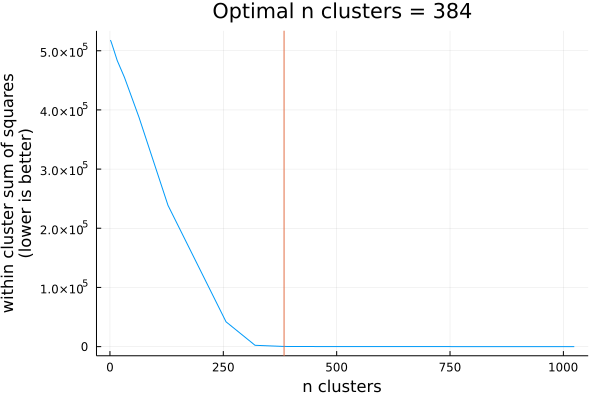

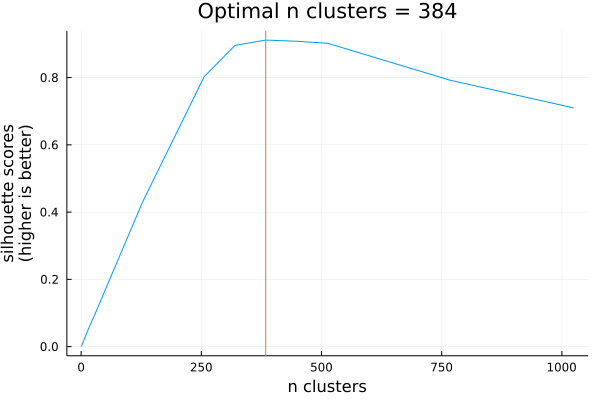

In [213]:
p1 = StatsPlots.plot(
    ks_assessed[1:length(within_cluster_sum_of_squares)],
    within_cluster_sum_of_squares,
    ylabel = "within cluster sum of squares\n(lower is better)",
    xlabel = "n clusters",
    title = "Optimal n clusters = $(optimal_number_of_clusters)",
    legend=false
)
StatsPlots.vline!(p1, [optimal_number_of_clusters])
p2 = StatsPlots.plot(
    ks_assessed[1:length(silhouette_scores)],
    silhouette_scores,
    ylabel = "silhouette scores\n(higher is better)",
    xlabel = "n clusters",
    title = "Optimal n clusters = $(optimal_number_of_clusters)",
    legend=false
)
StatsPlots.vline!(p2, [optimal_number_of_clusters])
display(p1)
display(p2)

In [216]:
optimal_clustering_result = Clustering.kmeans(distance_matrix, optimal_number_of_clusters)
record_table[!, "cluster_assignments"] = optimal_clustering_result.assignments
show(record_table, allcols=true)

In [219]:
sorted_clusters = sort(collect(StatsBase.countmap(record_table[!, "cluster_assignments"])), by=x->x[2], rev=true)

cluster_descriptions = DataFrames.DataFrame(
    cluster_id = Int[],
    cluster_count = Int[],
    cluster_description = String[]
)
for cluster in first.(sorted_clusters)
    word_cloud = Dict{String, Int}()
    cluster_indices = findall(record_table[!, "cluster_assignments"] .== cluster)
    for row in DataFrames.eachrow(record_table[cluster_indices, DataFrames.Not("fastx_file")])
        # @show row["record_identifier"]
        # @show row["record_description"]
        filtered_description = replace(row["record_description"], r"\[.*?\]$" => "")
        # @show filtered_description
        merge!(+, word_cloud, StatsBase.countmap(split(lowercase(filtered_description))))
    end
    word_cloud

    word_cloud = sort(collect(word_cloud), by=x->x[2], rev=true)

    if length(word_cloud) > 1
        word_cloud = filter(x -> x[2] > 1, word_cloud)
    end
    uninformative_words = [
        "hypothetical",
        "putative",
        "protein",
        "of"
    ]
    word_cloud = filter(x -> !(x[1] in uninformative_words), word_cloud)
    # filter out any words that are substrings of other words (e.g. sir2 is a substring of sir2-like)
    word_cloud = filter(x -> !any(y -> x[1] != y[1] && occursin(x[1], y[1]), word_cloud), word_cloud)

    joint_descriptor = join(first.(word_cloud), " ")
    if isempty(joint_descriptor)
        joint_descriptor = "hypothetical protein of uknown function"
    end
    row = (
        cluster_id = cluster,
        cluster_count = length(cluster_indices),
        cluster_description = joint_descriptor
    )
    push!(cluster_descriptions, row)
end

show(cluster_descriptions[cluster_descriptions[!, "cluster_description"] .!= "hypothetical protein of uknown function", :], allrows=true, allcols=true)

In [220]:
# heatmap of clusters against genomes

In [221]:
# record_table[!, ["fastx_file", "cluster_assignments"]]

In [224]:
n_fastas = length(fastx_files)
n_clusters = optimal_number_of_clusters
fasta_cluster_containment_matrix = falses(n_fastas, n_clusters)

for (i, fastx_file_group) in enumerate(DataFrames.groupby(record_table, "fastx_file"))
    clusters_contained = unique(fastx_file_group[!, "cluster_assignments"])
    for cluster in clusters_contained
        fasta_cluster_containment_matrix[i, cluster] = true
    end
end

clusters_ordered_by_coreness = sortperm(map(col -> sum(col), eachcol(fasta_cluster_containment_matrix)), rev=true)
StatsPlots.heatmap(
    fasta_cluster_containment_matrix[:, clusters_ordered_by_coreness],
    # legend = false,
    title = "Core and accessory protein clusters",
    ylabel = "genome index",
    xlabel = "ordered protein clusters",
    yticks = false,
    xticks = false,
    margins = 1StatsPlots.cm
)

In [225]:
cluster_descriptions

,cluster_id,cluster_count,cluster_description
,Int64,Int64,String
1,298,93,hypothetical protein of uknown function
2,260,15,"reductase iii class ribonucleotide ribonucleoside-triphosphate subunit large (anaerobic), ntp"
3,35,14,hypothetical protein of uknown function
4,185,14,hypothetical protein of uknown function
5,168,14,hypothetical protein of uknown function
6,183,14,glutaredoxin 1
7,75,14,hypothetical protein of uknown function
8,68,14,methyltransferase dna
9,82,14,hypothetical protein of uknown function


In [227]:
names(record_table)

4-element Vector{String}:
 "fastx_file"
 "record_identifier"
 "record_description"
 "cluster_assignments"

In [228]:
record_table[!, "cluster_assignments"]

3734-element Vector{Int64}:
 209
 370
 234
  50
 125
 268
 303
 211
 114
 252
  94
 190
 264
   ⋮
   9
 339
 274
 298
 141
  47
 298
 222
  11
 298
 345
 314

In [229]:
joint_table = DataFrames.innerjoin(record_table, cluster_descriptions, on="cluster_assignments" => "cluster_id")

,fastx_file
,String
1,/home/jupyter-cameron.prybol/workspace/2022-03-06-ecoli-phapecoctavirus-core-genome/protein.faa.gz/GCA_000906475.1_ViralProj185315_protein.faa.gz
2,/home/jupyter-cameron.prybol/workspace/2022-03-06-ecoli-phapecoctavirus-core-genome/protein.faa.gz/GCA_000906475.1_ViralProj185315_protein.faa.gz
3,/home/jupyter-cameron.prybol/workspace/2022-03-06-ecoli-phapecoctavirus-core-genome/protein.faa.gz/GCA_000906475.1_ViralProj185315_protein.faa.gz
4,/home/jupyter-cameron.prybol/workspace/2022-03-06-ecoli-phapecoctavirus-core-genome/protein.faa.gz/GCA_000906475.1_ViralProj185315_protein.faa.gz
5,/home/jupyter-cameron.prybol/workspace/2022-03-06-ecoli-phapecoctavirus-core-genome/protein.faa.gz/GCA_000906475.1_ViralProj185315_protein.faa.gz
6,/home/jupyter-cameron.prybol/workspace/2022-03-06-ecoli-phapecoctavirus-core-genome/protein.faa.gz/GCA_000906475.1_ViralProj185315_protein.faa.gz
7,/home/jupyter-cameron.prybol/workspace/2022-03-06-ecoli-phapecoctavirus-core-genome/protein.faa.gz/GCA_000906475.1_ViralProj185315_protein.faa.gz
8,/home/jupyter-cameron.prybol/workspace/2022-03-06-ecoli-phapecoctavirus-core-genome/protein.faa.gz/GCA_000906475.1_ViralProj185315_protein.faa.gz
9,/home/jupyter-cameron.prybol/workspace/2022-03-06-ecoli-phapecoctavirus-core-genome/protein.faa.gz/GCA_000906475.1_ViralProj185315_protein.faa.gz


In [230]:
joint_table[!, "cluster_count"]

3734-element Vector{Int64}:
 12
  5
 12
 11
 12
  4
  6
 10
 10
 10
 11
 12
 10
  ⋮
 14
  1
 10
 93
 14
 11
 93
 11
 11
 93
  1
  1

In [232]:
joint_table[!, "cluster_frequency"] = joint_table[!, "cluster_count"] ./ n_fastas

3734-element Vector{Float64}:
 0.8571428571428571
 0.35714285714285715
 0.8571428571428571
 0.7857142857142857
 0.8571428571428571
 0.2857142857142857
 0.42857142857142855
 0.7142857142857143
 0.7142857142857143
 0.7142857142857143
 0.7857142857142857
 0.8571428571428571
 0.7142857142857143
 ⋮
 1.0
 0.07142857142857142
 0.7142857142857143
 6.642857142857143
 1.0
 0.7857142857142857
 6.642857142857143
 0.7857142857142857
 0.7857142857142857
 6.642857142857143
 0.07142857142857142
 0.07142857142857142

In [233]:
uCSV.write("$(joint_fasta_outfile).protein_clusters.tsv", joint_table, delim='\t')

In [ ]:
# CREATE CONSUSES PROTEIN FOR EACH PROTEIN CLUSTER